In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spot = pd.read_csv('NordPool\SpotSEK_MWh.csv', sep=";")
flowTo = pd.read_csv('NordPool\FlowToSE3MWh.csv', sep=";")
flowFrom = pd.read_csv('NordPool\FlowFromSE3MWh.csv', sep=";")

prod = pd.read_csv('NordPool\ProductionGWh.csv', sep=";")
cons = pd.read_csv('NordPool\ConsumptionGWh.csv', sep=";")

capFrom = pd.read_csv('NordPool\CapacityFromSE3.csv', sep=";")
capTo = pd.read_csv('NordPool\CapacityFromSE3.csv', sep=";")

prodM = pd.read_csv('Svenska kraftnät\ProductionMWh.csv', sep=";")
gas = pd.read_csv('Svenska kraftnät\GasTurbineMWh.csv', sep=";")

spot['#Hour'] = pd.to_datetime(spot['#Hour'])
flowTo['#Hour'] = pd.to_datetime(flowTo['#Hour'], format = "%d.%m.%Y %H:%M")
flowFrom['#Hour'] = pd.to_datetime(flowFrom['#Hour'], format = "%d.%m.%Y %H:%M")

prod['#Hour'] = pd.to_datetime(prod['#Hour'], format = "%d.%m.%Y %H:%M")
cons['#Hour'] = pd.to_datetime(cons['#Hour'], format = "%d.%m.%Y %H:%M")

capFrom['#Hour'] = pd.to_datetime(capFrom['#Hour'], format = "%d.%m.%Y %H:%M")
capTo['#Hour'] = pd.to_datetime(capTo['#Hour'], format = "%d.%m.%Y %H:%M")

prodM['#Hour'] = pd.to_datetime(flowFrom['#Hour'], format = "%d.%m.%Y %H:%M")

spot.fillna(0, inplace=True)
prodM.fillna(0, inplace=True)


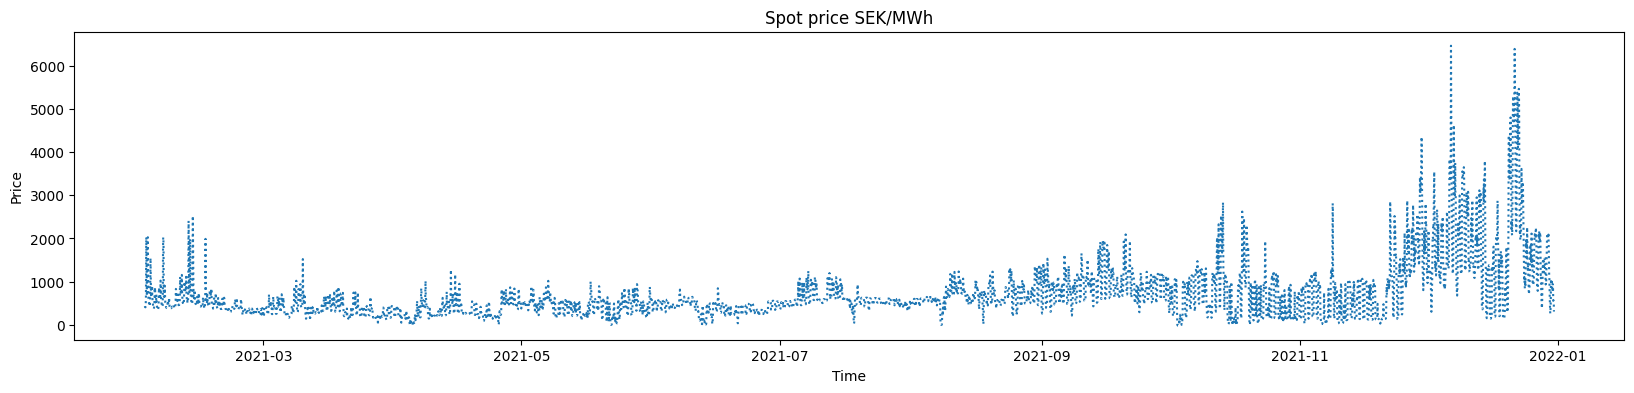

In [2]:
spot2021 = spot[(spot['#Hour'] >= '2021-01-01') & (spot['#Hour'] <= '2021-12-31')]

plt.figure(figsize=(20,4))

plt.plot(spot2021['#Hour'], spot2021['SPOTSE3'], linestyle = 'dotted')
plt.title('Spot price SEK/MWh')
plt.xlabel('Time')
plt.ylabel('Price')

plt.show()

<Axes: >

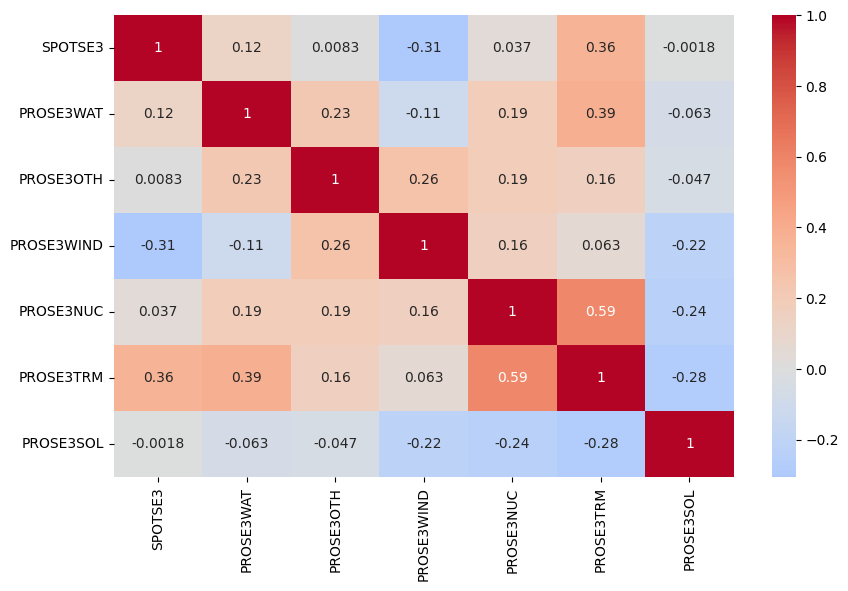

In [17]:
import seaborn as sns

plt.figure(figsize=(10,6))
spot = spot[:26496]

# corr = np.corrcoef(spot['SPOTSE3'], prodM[['PROSE3WAT', 'PROSE3WIND']])
C = pd.concat([spot['SPOTSE3'], prodM.iloc[:, 1:]], axis=1)
corr = C.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

<Axes: >

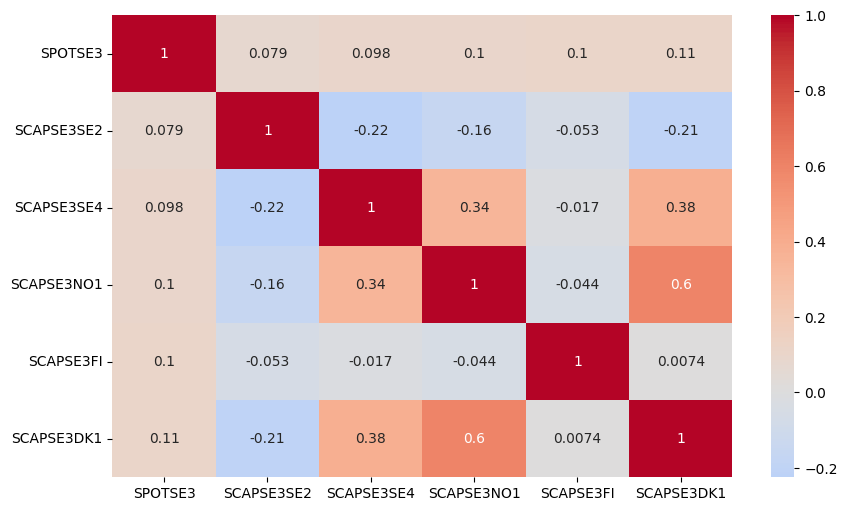

In [25]:
plt.figure(figsize=(10,6))
spot = spot[:26496]

C = pd.concat([spot['SPOTSE3'], capFrom.iloc[:, 1:]], axis=1)
corr = C.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

In [ ]:
# The Augmented Dickey-Fuller (ADF) test, a type of unit root test, determines how strongly a time series is defined by a trend. Its hypotheses are the following:

# Null Hypothesis  H0
#  : There is a unit root in the time series, i.e. the series is autocorrelated with (r=1), a time dependent structure and thus, is not stationary.
# Alternate Hypothesis  H1
#  : The time series has no unit root and is either stationary or can be made stationary using differencing.

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(spot)

print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

In [ ]:
# The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, follows the opposite logic from Augmented Dickey-Fuller test and checks for stationarity. Its hypotheses are the following:

# Null Hypothesis  H0
#  : The time series is level, i.e. it is stationary around a constant.
# Alternate Hypothesis  H1
#  : There is a unit root in the time series and thus it not stationary.

from statsmodels.tsa.stattools import kpss

kpss_test = kpss(spot, regression='c')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(spot, lags=50, ax=ax1)
plot_pacf(spot, lags=50, ax=ax2)
plt.tight_layout()
plt.show()